## Finding the optimal model and hyperparameters 

In [1]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split as ttp
import statistics
digits = load_digits()
import matplotlib.pyplot as plt
%matplotlib  inline


## Exploring the dataset

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

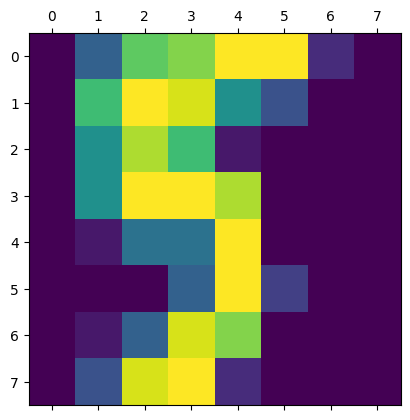

In [5]:
plt.matshow(digits.images[15])
plt.show()

In [6]:
digits.target[15]

5

In [7]:
X_train, X_test, y_train, y_test = ttp(digits.data, digits.target, test_size = 0.3, random_state = 42)

## Model selection

In [8]:
from pycaret.classification import *


In [9]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df['target'] = digits.target

In [10]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
s = setup(df, target = 'target')

,Description,Value
0,Session id,5898
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(1797, 65)"
4,Transformed data shape,"(1797, 65)"
5,Transformed train set shape,"(1257, 65)"
6,Transformed test set shape,"(540, 65)"
7,Numeric features,64
8,Preprocess,True
9,Imputation type,simple


In [12]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9817,0.9981,0.9817,0.9829,0.9816,0.9797,0.9798,0.0840
et,Extra Trees Classifier,0.9785,0.9996,0.9785,0.9806,0.9785,0.9762,0.9764,0.2700
lightgbm,Light Gradient Boosting Machine,0.9706,0.9988,0.9706,0.9726,0.9706,0.9673,0.9675,1.9050
rf,Random Forest Classifier,0.9682,0.9992,0.9682,0.9712,0.9678,0.9647,0.9651,0.3990
gbc,Gradient Boosting Classifier,0.9618,0.0000,0.9618,0.9650,0.9617,0.9576,0.9580,4.0290
lr,Logistic Regression,0.9555,0.0000,0.9555,0.9585,0.9552,0.9505,0.9509,1.7350
svm,SVM - Linear Kernel,0.9507,0.0000,0.9507,0.9559,0.9505,0.9452,0.9458,0.0920
lda,Linear Discriminant Analysis,0.9499,0.0000,0.9499,0.9538,0.9503,0.9443,0.9447,0.0480
ridge,Ridge Classifier,0.9284,0.0000,0.9284,0.9322,0.9279,0.9205,0.9210,0.0820
nb,Naive Bayes,0.8480,0.9692,0.8480,0.8727,0.8478,0.8311,0.8339,0.0630


In [13]:
print(best)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


## Working with the 3rd best model: Random Forest Classifier 

In [14]:
rf_model = RandomForestClassifier(random_state = 42)

## Grid-Search cross validation

In [15]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(rf_model, {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 1)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              monotonic_cst=None,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

## Best parameters and score

In [16]:
print("Best Parameters:", clf.best_params_)
print("Best CV Accuracy:", clf.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy: 0.972965281730222


In [17]:
results = pd.DataFrame(clf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.590258,0.058799,0.013564,0.003385,None,sqrt,1,2,50,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.972222,0.952381,0.980080,0.972112,0.976096,0.970578,0.009559,4
1,1.307772,0.279793,0.047938,0.012009,None,sqrt,1,2,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.972222,0.944444,0.976096,0.976096,0.972112,0.968194,0.012004,21
2,1.735254,0.303656,0.046511,0.004675,None,sqrt,1,2,150,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.972222,0.944444,0.976096,0.976096,0.972112,0.968194,0.012004,21
3,0.475781,0.016114,0.018238,0.002604,None,sqrt,1,5,50,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.956349,0.952381,0.968127,0.968127,0.964143,0.961826,0.006387,64
4,0.991405,0.020899,0.040864,0.003622,None,sqrt,1,5,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.964286,0.948413,0.972112,0.976096,0.960159,0.964213,0.009692,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.633028,0.006412,0.023664,0.002417,20,log2,2,2,100,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.960317,0.948413,0.972112,0.980080,0.968127,0.965810,0.010785,41
68,0.962256,0.013722,0.035415,0.003337,20,log2,2,2,150,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.964286,0.948413,0.976096,0.976096,0.968127,0.966603,0.010186,36
69,0.327120,0.013396,0.014590,0.002814,20,log2,2,5,50,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.972222,0.940476,0.972112,0.980080,0.964143,0.965807,0.013631,44
70,0.648674,0.017808,0.022875,0.001000,20,log2,2,5,100,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.976190,0.952381,0.980080,0.976096,0.960159,0.968981,0.010763,18


In [18]:
sorted_results = results.sort_values(by = 'rank_test_score')
sorted_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.691332,0.013247,0.024574,0.002074,None,log2,1,2,100,"{'max_depth': None, 'max_features': 'log2', 'm...",0.976190,0.952381,0.980080,0.972112,0.984064,0.972965,0.011033,1
61,0.686061,0.019114,0.022916,0.000969,20,log2,1,2,100,"{'max_depth': 20, 'max_features': 'log2', 'min...",0.976190,0.952381,0.980080,0.972112,0.984064,0.972965,0.011033,1
37,0.701214,0.017051,0.024187,0.001441,10,log2,1,2,100,"{'max_depth': 10, 'max_features': 'log2', 'min...",0.976190,0.960317,0.976096,0.980080,0.968127,0.972162,0.007085,3
0,0.590258,0.058799,0.013564,0.003385,None,sqrt,1,2,50,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.972222,0.952381,0.980080,0.972112,0.976096,0.970578,0.009559,4
48,0.362923,0.002500,0.013761,0.002287,20,sqrt,1,2,50,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",0.972222,0.952381,0.980080,0.972112,0.976096,0.970578,0.009559,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.341833,0.006417,0.013953,0.002129,20,sqrt,2,5,50,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",0.956349,0.952381,0.964143,0.964143,0.964143,0.960232,0.004952,68
9,0.426541,0.020527,0.016008,0.004083,None,sqrt,2,5,50,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.956349,0.952381,0.964143,0.964143,0.964143,0.960232,0.004952,68
33,0.360022,0.015324,0.011878,0.001192,10,sqrt,2,5,50,"{'max_depth': 10, 'max_features': 'sqrt', 'min...",0.944444,0.948413,0.968127,0.972112,0.960159,0.958651,0.010770,70
18,0.461720,0.041488,0.018808,0.002862,None,log2,2,2,50,"{'max_depth': None, 'max_features': 'log2', 'm...",0.948413,0.944444,0.960159,0.972112,0.964143,0.957854,0.010170,71


## Evaluation on the test set

In [19]:

from sklearn.metrics import classification_report
best_rf = clf.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred))


Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        47
           3       1.00      0.93      0.96        54
           4       0.97      1.00      0.98        60
           5       0.95      0.94      0.95        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.91      0.98      0.94        43
           9       0.95      0.95      0.95        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

